In [1]:
import pandas as pd
import numpy as np

In [2]:
# fazendo a leitura da base enriquecida, trabalhada na etapa anterior
df = pd.read_csv("base_enriquecida_codigos")

In [3]:
df

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725
2,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,4.108924,4.154725
3,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,4.108924,4.154725
4,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,4.108924,4.154725
...,...,...,...,...,...,...,...,...,...,...,...,...
1764428,2019-08,85365090,11,271,SP,4,817600,11,157,4412,4.019382,3.778713
1764429,2019-08,30043918,10,767,SP,4,817600,225,225,1216801,4.019382,3.778713
1764430,2019-08,90189099,11,87,SP,1,817800,5033,178,22889,4.019382,3.778713
1764431,2019-08,84123900,11,764,PA,4,817600,1,83,7641,4.019382,3.778713


In [4]:
# filtrando apenas os registros em que a medida estatística não é "quilograma"
df1=df[df["CO_UNID"]!=10]

In [5]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,4.108924,4.154725
9,2019-12,84719012,11,858,SP,4,817600,1,0,670,4.108924,4.154725
10,2019-12,84798210,11,249,SP,4,817600,15,240,29403,4.108924,4.154725
...,...,...,...,...,...,...,...,...,...,...,...,...
1764427,2019-08,84243010,11,249,SP,4,817600,22,56,24875,4.019382,3.778713
1764428,2019-08,85365090,11,271,SP,4,817600,11,157,4412,4.019382,3.778713
1764430,2019-08,90189099,11,87,SP,1,817800,5033,178,22889,4.019382,3.778713
1764431,2019-08,84123900,11,764,PA,4,817600,1,83,7641,4.019382,3.778713


In [6]:
# considerando que iremos testar uma nova variável alvo (VL_FOB/KG_LIQUIDO), não pode haver KG_LIQUIDO zerado. Checar:
df1[df1["KG_LIQUIDO"]==0]

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
9,2019-12,84719012,11,858,SP,4,817600,1,0,670,4.108924,4.154725
48,2019-01,84212300,11,23,BA,1,817800,15,0,12,3.741055,3.884405
60,2019-01,84821010,11,399,SE,4,517801,50,0,126,3.741055,3.884405
183,2019-11,85322420,11,160,MG,4,617700,1000,0,152,4.154725,4.086387
197,2019-01,85366990,11,23,MG,4,617700,5,0,160,3.741055,3.884405
...,...,...,...,...,...,...,...,...,...,...,...,...
1764371,2019-08,85365030,11,196,SP,4,817700,15,0,113,4.019382,3.778713
1764372,2019-08,84099979,11,399,SP,4,817600,5,0,359,4.019382,3.778713
1764389,2019-08,84831090,11,776,AM,4,227700,2,0,2,4.019382,3.778713
1764392,2019-08,85334099,11,764,SP,1,817800,2,0,325,4.019382,3.778713


In [7]:
# Conforme verificado acima, aproximadamente 11% dos registros estão com o KG_LIQUIDO "zerado", o que pode se dar a diversos motivos ()

In [8]:
df_remove = df1.loc[(df1["KG_LIQUIDO"]==0)] 

In [9]:
df1 = df1.drop(df_remove.index)

In [10]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,4.108924,4.154725
10,2019-12,84798210,11,249,SP,4,817600,15,240,29403,4.108924,4.154725
16,2019-12,87087090,11,249,SC,1,927700,5,50,1050,4.108924,4.154725
...,...,...,...,...,...,...,...,...,...,...,...,...
1764422,2019-08,85389020,11,386,SP,4,817700,100,6,1832,4.019382,3.778713
1764427,2019-08,84243010,11,249,SP,4,817600,22,56,24875,4.019382,3.778713
1764428,2019-08,85365090,11,271,SP,4,817600,11,157,4412,4.019382,3.778713
1764430,2019-08,90189099,11,87,SP,1,817800,5033,178,22889,4.019382,3.778713


###### Checando códigos NCM recorrentes

In [11]:
# checando quais os códigos NCM mais recorrentes, tendo em vista que não foi possível "dummizar" todos em teste anteriormente realizado
g1=df1.groupby(['CO_NCM']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_NCM,contagem
1907,85365090,7043
1918,85369090,6563
2095,87082999,4913
1486,84834090,4201
1463,84818099,4176
...,...,...
1430,84798940,1
1098,84453090,1
222,44072910,1
652,84041020,1


In [12]:
g1["% CO_NCM"] = g1["contagem"]/(g1["contagem"].sum())

In [13]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [14]:
g2["% CO_NCM ACUMUL"]=g2["% CO_NCM"].cumsum()

In [15]:
g2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2590 entries, 1907 to 1104
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CO_NCM           2590 non-null   int64  
 1   contagem         2590 non-null   int64  
 2   % CO_NCM         2590 non-null   float64
 3   % CO_NCM ACUMUL  2590 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 101.2 KB


In [16]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_NCM, a ideia é reduzir o número de categorias)
g3=g2[g2["% CO_NCM ACUMUL"]<=0.95]
g3
# repare que 95% das ocorrências se restingem a 1227 códigos NCM dentre os 2590.

,CO_NCM,contagem,% CO_NCM,% CO_NCM ACUMUL
1907,85365090,7043,0.010042,0.010042
1918,85369090,6563,0.009358,0.019400
2095,87082999,4913,0.007005,0.026405
1486,84834090,4201,0.005990,0.032395
1463,84818099,4176,0.005954,0.038349
...,...,...,...,...
35,17019900,83,0.000118,0.949495
2052,87032390,82,0.000117,0.949612
1645,85152100,82,0.000117,0.949729
1273,84641000,82,0.000117,0.949846


In [17]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% CO_NCM ACUMUL"]>0.95]
g4

,CO_NCM,contagem,% CO_NCM,% CO_NCM ACUMUL
2166,89039900,82,0.000117,0.950080
242,44089090,82,0.000117,0.950197
1001,84371000,82,0.000117,0.950314
342,61044900,82,0.000117,0.950431
1165,84522924,82,0.000117,0.950548
...,...,...,...,...
1430,84798940,1,0.000001,0.999994
1098,84453090,1,0.000001,0.999996
222,44072910,1,0.000001,0.999997
652,84041020,1,0.000001,0.999999


In [18]:
# obtendo os 5% códigos NCM menos recorrentes, para agrupar como "outros" no df1 original
idx=g4["CO_NCM"]

In [19]:
mask=df1['CO_NCM'].isin(idx)
mask

0          False
1          False
6          False
10         False
16         False
           ...  
1764422    False
1764427    False
1764428    False
1764430    False
1764431    False
Name: CO_NCM, Length: 701341, dtype: bool

In [20]:
df1["CO_NCM_final"]=df1["CO_NCM"]

In [21]:
# substituir os 5% NCM menos recorrentes pelo código 99999999 (alterou-se a coluna auxiliar CO_NCM_final para preservar a original CO_NCM)
df1.loc[mask, "CO_NCM_final"] = 99999999

In [22]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725,85044021
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725,85183000
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,4.108924,4.154725,85042100
10,2019-12,84798210,11,249,SP,4,817600,15,240,29403,4.108924,4.154725,84798210
16,2019-12,87087090,11,249,SC,1,927700,5,50,1050,4.108924,4.154725,87087090
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764422,2019-08,85389020,11,386,SP,4,817700,100,6,1832,4.019382,3.778713,85389020
1764427,2019-08,84243010,11,249,SP,4,817600,22,56,24875,4.019382,3.778713,84243010
1764428,2019-08,85365090,11,271,SP,4,817600,11,157,4412,4.019382,3.778713,85365090
1764430,2019-08,90189099,11,87,SP,1,817800,5033,178,22889,4.019382,3.778713,90189099


In [23]:
df1["CO_NCM_final"].value_counts()

99999999    35093
85365090     7043
85369090     6563
87082999     4913
84834090     4201
            ...  
62029900       83
84641000       82
85152100       82
87032390       82
84082030       82
Name: CO_NCM_final, Length: 1228, dtype: int64

###### Checando códigos UNID MED EST (CO_UNID) recorrentes

In [24]:
g1=df1.groupby(['CO_UNID']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_UNID,contagem
0,11,676898
2,13,8040
4,15,5895
6,17,5688
5,16,2207
10,21,1660
8,19,310
1,12,281
11,22,165
9,20,149


In [25]:
df1["CO_UNID_final"]=df1["CO_UNID"]

In [26]:
mask=df1['CO_UNID']!=11
mask

0          False
1          False
6          False
10         False
16         False
           ...  
1764422    False
1764427    False
1764428    False
1764430    False
1764431    False
Name: CO_UNID, Length: 701341, dtype: bool

In [27]:
df1.loc[mask, "CO_UNID_final"] = 99

In [28]:
df1["CO_UNID_final"].value_counts()

11    676898
99     24443
Name: CO_UNID_final, dtype: int64

###### Checando países (CO_PAIS) recorrentes

In [29]:
g1=df1.groupby(['CO_PAIS']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_PAIS,contagem
40,160,156235
61,249,76541
3,23,52198
92,386,40755
94,399,31801
...,...,...
130,542,1
124,511,1
122,501,1
111,472,1


In [30]:
g1["% CO_PAIS"] = g1["contagem"]/(g1["contagem"].sum())

In [31]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [32]:
g2["% CO_PAIS ACUMUL"]=g2["% CO_PAIS"].cumsum()

In [33]:
g2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 40 to 200
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CO_PAIS           201 non-null    int64  
 1   contagem          201 non-null    int64  
 2   % CO_PAIS         201 non-null    float64
 3   % CO_PAIS ACUMUL  201 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 7.9 KB


In [34]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_PAIS, a ideia é reduzir o número de categorias)
g3=g2[g2["% CO_PAIS ACUMUL"]<=0.95]
g3.info()
# repare que 95% das ocorrências se restingem a 38 países dentre os 201.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 40 to 17
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CO_PAIS           38 non-null     int64  
 1   contagem          38 non-null     int64  
 2   % CO_PAIS         38 non-null     float64
 3   % CO_PAIS ACUMUL  38 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.5 KB


In [35]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% CO_PAIS ACUMUL"]>0.95]
g4

,CO_PAIS,contagem,% CO_PAIS,% CO_PAIS ACUMUL
112,474,2422,0.003453,0.952899
129,538,2091,0.002981,0.955880
30,111,2053,0.002927,0.958807
89,375,2004,0.002857,0.961665
34,141,1884,0.002686,0.964351
...,...,...,...,...
130,542,1,0.000001,0.999994
124,511,1,0.000001,0.999996
122,501,1,0.000001,0.999997
111,472,1,0.000001,0.999999


In [36]:
# obtendo os 5% países menos recorrentes, para agrupar como "outros" no df original
idx=g4["CO_PAIS"]

In [37]:
mask=df1['CO_PAIS'].isin(idx)
mask

0          False
1          False
6          False
10         False
16         False
           ...  
1764422    False
1764427    False
1764428    False
1764430    False
1764431    False
Name: CO_PAIS, Length: 701341, dtype: bool

In [38]:
df1["CO_PAIS_final"]=df1["CO_PAIS"]

In [39]:
# substituir os 5% NCM menos recorrentes pelo código 99999999 (alterou-se a coluna auxiliar CO_PAIS_final para preservar a original CO_PAIS)
df1.loc[mask, "CO_PAIS_final"] = 999

In [40]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final,CO_UNID_final,CO_PAIS_final
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725,85044021,11,249
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725,85183000,11,160
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,4.108924,4.154725,85042100,11,764
10,2019-12,84798210,11,249,SP,4,817600,15,240,29403,4.108924,4.154725,84798210,11,249
16,2019-12,87087090,11,249,SC,1,927700,5,50,1050,4.108924,4.154725,87087090,11,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764422,2019-08,85389020,11,386,SP,4,817700,100,6,1832,4.019382,3.778713,85389020,11,386
1764427,2019-08,84243010,11,249,SP,4,817600,22,56,24875,4.019382,3.778713,84243010,11,249
1764428,2019-08,85365090,11,271,SP,4,817600,11,157,4412,4.019382,3.778713,85365090,11,271
1764430,2019-08,90189099,11,87,SP,1,817800,5033,178,22889,4.019382,3.778713,90189099,11,87


In [41]:
df1["CO_PAIS_final"].value_counts()

160    156235
249     76541
23      52198
386     40755
999     35456
399     31801
161     23578
275     21041
493     20672
190     18852
628     15489
361     15174
245     13985
776     13689
764     11994
351     10979
767      9245
455      8978
858      8922
791      8336
72       8087
603      7982
365      7252
573      7237
63       7078
827      7064
149      6998
355      6354
232      5623
670      5346
267      5273
607      5185
87       4977
271      4809
105      4360
741      4287
247      4009
383      2853
81       2647
Name: CO_PAIS_final, dtype: int64

###### Checando países (SG_UF_NCM) recorrentes

In [42]:
g1=df1.groupby(['SG_UF_NCM']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,SG_UF_NCM,contagem
25,SP,271990
23,SC,78019
17,PR,57802
10,MG,53177
18,RJ,50627
22,RS,43297
2,AM,41142
4,BA,20135
7,ES,18661
8,GO,11419


In [43]:
g1["% SG_UF_NCM"] = g1["contagem"]/(g1["contagem"].sum())

In [44]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [45]:
g2["% SG_UF_NCM ACUMUL"]=g2["% SG_UF_NCM"].cumsum()

In [46]:
g2.head()

,SG_UF_NCM,contagem,% SG_UF_NCM,% SG_UF_NCM ACUMUL
25,SP,271990,0.387814,0.387814
23,SC,78019,0.111243,0.499057
17,PR,57802,0.082416,0.581473
10,MG,53177,0.075822,0.657295
18,RJ,50627,0.072186,0.729481


In [47]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável SG_UF_NCM, a ideia é reduzir o número de categorias)
g3=g2[g2["% SG_UF_NCM ACUMUL"]<=0.95]
g3
# repare que 95% das ocorrências se restingem a 12 UF dentre as 27.

,SG_UF_NCM,contagem,% SG_UF_NCM,% SG_UF_NCM ACUMUL
25,SP,271990,0.387814,0.387814
23,SC,78019,0.111243,0.499057
17,PR,57802,0.082416,0.581473
10,MG,53177,0.075822,0.657295
18,RJ,50627,0.072186,0.729481
22,RS,43297,0.061735,0.791216
2,AM,41142,0.058662,0.849878
4,BA,20135,0.028709,0.878587
7,ES,18661,0.026608,0.905194
8,GO,11419,0.016282,0.921476


In [48]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% SG_UF_NCM ACUMUL"]>0.95]
g4

,SG_UF_NCM,contagem,% SG_UF_NCM,% SG_UF_NCM ACUMUL
5,CE,8236,0.011743,0.957871
1,AL,7895,0.011257,0.969128
13,PA,5296,0.007551,0.976679
6,DF,3168,0.004517,0.981196
11,MS,3088,0.004403,0.985599
14,PB,2085,0.002973,0.988572
12,MT,1734,0.002472,0.991044
19,RN,1704,0.002430,0.993474
26,TO,1069,0.001524,0.994998
24,SE,1000,0.001426,0.996424


In [49]:
# obtendo os 5% UF menos recorrentes, para agrupar como "outros" no df original
idx=g4["SG_UF_NCM"]

In [50]:
mask=df1['SG_UF_NCM'].isin(idx)
mask

0          False
1          False
6          False
10         False
16         False
           ...  
1764422    False
1764427    False
1764428    False
1764430    False
1764431     True
Name: SG_UF_NCM, Length: 701341, dtype: bool

In [51]:
df1["SG_UF_NCM_final"]=df1["SG_UF_NCM"]

In [52]:
# substituir os 5% NCM menos recorrentes pelo código 99 (alterou-se a coluna auxiliar SG_UF_NCM_final para preservar a original SG_UF_NCM)
df1.loc[mask, "SG_UF_NCM_final"] = 99

In [53]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final,CO_UNID_final,CO_PAIS_final,SG_UF_NCM_final
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725,85044021,11,249,SP
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725,85183000,11,160,GO
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,4.108924,4.154725,85042100,11,764,SP
10,2019-12,84798210,11,249,SP,4,817600,15,240,29403,4.108924,4.154725,84798210,11,249,SP
16,2019-12,87087090,11,249,SC,1,927700,5,50,1050,4.108924,4.154725,87087090,11,249,SC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764422,2019-08,85389020,11,386,SP,4,817700,100,6,1832,4.019382,3.778713,85389020,11,386,SP
1764427,2019-08,84243010,11,249,SP,4,817600,22,56,24875,4.019382,3.778713,84243010,11,249,SP
1764428,2019-08,85365090,11,271,SP,4,817600,11,157,4412,4.019382,3.778713,85365090,11,271,SP
1764430,2019-08,90189099,11,87,SP,1,817800,5033,178,22889,4.019382,3.778713,90189099,11,87,SP


In [54]:
df1["SG_UF_NCM_final"].value_counts()

SP    271990
SC     78019
PR     57802
MG     53177
RJ     50627
RS     43297
AM     41142
99     37783
BA     20135
ES     18661
GO     11419
RO      8685
PE      8604
Name: SG_UF_NCM_final, dtype: int64

###### Checando modais (CO_VIA) recorrentes

In [55]:
g1=df1.groupby(['CO_VIA']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_VIA,contagem
2,4,352769
1,1,324627
0,0,13387
4,7,9818
7,10,473
6,9,172
3,5,81
5,8,14


In [56]:
g1["% CO_VIA"] = g1["contagem"]/(g1["contagem"].sum())

In [57]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [58]:
g2["% CO_VIA ACUMUL"]=g2["% CO_VIA"].cumsum()

In [59]:
g2

,CO_VIA,contagem,% CO_VIA,% CO_VIA ACUMUL
2,4,352769,0.502992,0.502992
1,1,324627,0.462866,0.965858
0,0,13387,0.019088,0.984946
4,7,9818,0.013999,0.998945
7,10,473,0.000674,0.999619
6,9,172,0.000245,0.999865
3,5,81,0.000115,0.999980
5,8,14,0.000020,1.000000


In [60]:
df1["CO_VIA_final"]=df["CO_VIA"]

In [61]:
mask=(df1['CO_VIA']!=1) & (df['CO_VIA']!=4) & (df['CO_VIA']!=7)
mask

0          False
1          False
2          False
3          False
4          False
           ...  
1764428    False
1764429    False
1764430    False
1764431    False
1764432    False
Name: CO_VIA, Length: 1764433, dtype: bool

In [62]:
df1.loc[mask, "CO_VIA_final"] = 99

In [63]:
df1["CO_VIA_final"].value_counts()

4     352769
1     324627
99     14127
7       9818
Name: CO_VIA_final, dtype: int64

###### Não será levada em conta - inicialmente - a feature CO_URF, uma vez que essa está associada à SG_UF_NCM (que será "dummizada"). Posteriormente, pode-se substituir uma pela outra para ver se o modelo melhora.

###### Na sequência, as colunas de features categóricas darão origem às variáveis dummie, para, posteriormente, calcular a correlação das colunas restantes com a NOVA variável alvo ( VL_FOB/KG_LIQUIDO)

In [64]:
df1["VL_FOB/KG_LIQUIDO"]=df1["VL_FOB"]/df1["KG_LIQUIDO"]

In [65]:
df1.columns

Index(['ANO-MES', 'CO_NCM', 'CO_UNID', 'CO_PAIS', 'SG_UF_NCM', 'CO_VIA',
       'CO_URF', 'QT_ESTAT', 'KG_LIQUIDO', 'VL_FOB', 'câmbio_mês_atual',
       'câmbio_mês_anterior', 'CO_NCM_final', 'CO_UNID_final', 'CO_PAIS_final',
       'SG_UF_NCM_final', 'CO_VIA_final', 'VL_FOB/KG_LIQUIDO'],
      dtype='object')

In [66]:
df_encoded = pd.concat([df1, pd.get_dummies(df1["ANO-MES"],prefix="Mês")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,Mês_2019-03,Mês_2019-04,Mês_2019-05,Mês_2019-06,Mês_2019-07,Mês_2019-08,Mês_2019-09,Mês_2019-10,Mês_2019-11,Mês_2019-12
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,...,0,0,0,0,0,0,0,0,0,1
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,...,0,0,0,0,0,0,0,0,0,1
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,...,0,0,0,0,0,0,0,0,0,1


In [67]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_NCM_final"],prefix="NCM")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,NCM_96084000,NCM_96086000,NCM_96121019,NCM_96121090,NCM_96122000,NCM_96138000,NCM_96200000,NCM_97011000,NCM_97030000,NCM_99999999
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,...,0,0,0,0,0,0,0,0,0,0
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,...,0,0,0,0,0,0,0,0,0,0
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_UNID_final"],prefix="Un.Med.Est.")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,NCM_96121019,NCM_96121090,NCM_96122000,NCM_96138000,NCM_96200000,NCM_97011000,NCM_97030000,NCM_99999999,Un.Med.Est._11,Un.Med.Est._99
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,...,0,0,0,0,0,0,0,0,1,0
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,...,0,0,0,0,0,0,0,0,1,0
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,...,0,0,0,0,0,0,0,0,1,0


In [69]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_PAIS_final"],prefix="Pais")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,Pais_628,Pais_670,Pais_741,Pais_764,Pais_767,Pais_776,Pais_791,Pais_827,Pais_858,Pais_999
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,...,0,0,0,0,0,0,0,0,0,0
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,...,0,0,0,0,0,0,0,0,0,0
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,...,0,0,0,1,0,0,0,0,0,0


In [70]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["SG_UF_NCM_final"],prefix="UF")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,UF_ES,UF_GO,UF_MG,UF_PE,UF_PR,UF_RJ,UF_RO,UF_RS,UF_SC,UF_SP
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,...,0,0,0,0,0,0,0,0,0,1
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,...,0,1,0,0,0,0,0,0,0,0
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,...,0,0,0,0,0,0,0,0,0,1


In [71]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_VIA_final"],prefix="Modal")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,UF_PR,UF_RJ,UF_RO,UF_RS,UF_SC,UF_SP,Modal_1,Modal_4,Modal_7,Modal_99
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,...,0,0,0,0,0,1,0,1,0,0
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,...,0,0,0,0,0,0,0,1,0,0
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,...,0,0,0,0,0,1,1,0,0,0


In [72]:
# Exclusão das colunas das variáveis categóricas (que deram origem às variáveis dummie)
df_encoded = df_encoded.drop(columns=['ANO-MES', 'CO_NCM', 'CO_UNID', 'CO_PAIS', 'SG_UF_NCM', 'CO_VIA',
       'CO_URF', 'QT_ESTAT', 'VL_FOB', 'CO_NCM_final', 'CO_UNID_final', 'CO_PAIS_final',
       'SG_UF_NCM_final', 'CO_VIA_final'])

In [73]:
df_encoded.columns

Index(['KG_LIQUIDO', 'câmbio_mês_atual', 'câmbio_mês_anterior',
       'VL_FOB/KG_LIQUIDO', 'Mês_2019-01', 'Mês_2019-02', 'Mês_2019-03',
       'Mês_2019-04', 'Mês_2019-05', 'Mês_2019-06',
       ...
       'UF_PR', 'UF_RJ', 'UF_RO', 'UF_RS', 'UF_SC', 'UF_SP', 'Modal_1',
       'Modal_4', 'Modal_7', 'Modal_99'],
      dtype='object', length=1302)

In [74]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701341 entries, 0 to 1764431
Columns: 1302 entries, KG_LIQUIDO to Modal_99
dtypes: float64(3), int64(1), uint8(1298)
memory usage: 914.9 MB


Devido a problemas de falta de memória para o cálculo da correlação das variáveis do df_encoded com a variável alvo df_encoded ["VL_FOB/QT_ESTAT"], optou-se por fracionar o df_encoded, dividindo-o em 4 partes, mantendo-se, em todas elas, a variável alvo VL_FOB/QT_ESTAT e, desse forma, tentar calcular a correlação em partes (o importante seria manter a variável alvo, pois o que se busca é identificar quais as variáveis do df_encoded mais se relacionam com a variável alvo e, dessa forma, adotá-las para a implementação do modelo de ML)

In [75]:
df_encoded1de4=df_encoded.iloc[:,0:326]

In [76]:
df_encoded1de4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701341 entries, 0 to 1764431
Columns: 326 entries, KG_LIQUIDO to NCM_84145990
dtypes: float64(3), int64(1), uint8(322)
memory usage: 262.1 MB


In [77]:
df_encoded2de4=df_encoded.iloc[:,326:651]

In [78]:
df_encoded2de4["VL_FOB/KG_LIQUIDO"]=df_encoded["VL_FOB/KG_LIQUIDO"]

In [79]:
df_encoded2de4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701341 entries, 0 to 1764431
Columns: 326 entries, NCM_84146000 to VL_FOB/KG_LIQUIDO
dtypes: float64(1), uint8(325)
memory usage: 248.1 MB


In [80]:
df_encoded3de4=df_encoded.iloc[:,651:976]

In [81]:
df_encoded3de4["VL_FOB/KG_LIQUIDO"]=df_encoded["VL_FOB/KG_LIQUIDO"]

In [82]:
df_encoded3de4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701341 entries, 0 to 1764431
Columns: 326 entries, NCM_85044030 to VL_FOB/KG_LIQUIDO
dtypes: float64(1), uint8(325)
memory usage: 248.1 MB


In [83]:
df_encoded4de4=df_encoded.iloc[:,976:]

In [84]:
df_encoded4de4["VL_FOB/KG_LIQUIDO"]=df_encoded["VL_FOB/KG_LIQUIDO"]

In [85]:
df_encoded4de4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701341 entries, 0 to 1764431
Columns: 327 entries, NCM_87082991 to VL_FOB/KG_LIQUIDO
dtypes: float64(1), uint8(326)
memory usage: 248.7 MB


In [86]:
# Identificação das variáveis que mais se relacionam com a variável alvo ("VL_FOB/QT_ESTAT")
#correlacoes = df_encoded.corr().abs()["VL_FOB/QT_ESTAT"].sort_values()
#correlacoes

In [87]:
# como o cálculo das correlações para todo o df_encoded (código imediatamente acima) deu erro, faremos por partes:
correlacoes1de4 = df_encoded1de4.corr().abs()["VL_FOB/KG_LIQUIDO"].sort_values()
correlacoes1de4

NCM_61109000         0.000002
NCM_62031100         0.000018
NCM_62043200         0.000020
NCM_28042990         0.000028
NCM_62046100         0.000031
                       ...   
câmbio_mês_atual     0.002586
Mês_2019-04          0.003048
NCM_5111000          0.005555
NCM_71039900         0.006118
VL_FOB/KG_LIQUIDO    1.000000
Name: VL_FOB/KG_LIQUIDO, Length: 326, dtype: float64

In [88]:
correlacoes2de4 = df_encoded2de4.corr().abs()["VL_FOB/KG_LIQUIDO"].sort_values()
correlacoes2de4

NCM_85043229         0.000005
NCM_85041000         0.000042
NCM_84431990         0.000047
NCM_84719011         0.000053
NCM_84439199         0.000055
                       ...   
NCM_84718000         0.002619
NCM_84733049         0.002758
NCM_84439922         0.004474
NCM_84733042         0.005229
VL_FOB/KG_LIQUIDO    1.000000
Name: VL_FOB/KG_LIQUIDO, Length: 326, dtype: float64

In [89]:
correlacoes3de4 = df_encoded3de4.corr().abs()["VL_FOB/KG_LIQUIDO"].sort_values()
correlacoes3de4

NCM_85322119         1.931245e-07
NCM_85411019         5.441954e-06
NCM_85332120         1.072501e-05
NCM_85176251         1.742705e-05
NCM_85286990         1.772249e-05
                         ...     
NCM_85423939         1.295051e-02
NCM_85423931         1.683665e-02
NCM_85423229         1.804279e-02
NCM_85423120         2.064646e-02
VL_FOB/KG_LIQUIDO    1.000000e+00
Name: VL_FOB/KG_LIQUIDO, Length: 326, dtype: float64

In [90]:
correlacoes4de4 = df_encoded4de4.corr().abs()["VL_FOB/KG_LIQUIDO"].sort_values()
correlacoes4de4

NCM_90272029         0.000002
NCM_90292020         0.000008
NCM_90251190         0.000010
NCM_90152010         0.000011
NCM_90173010         0.000012
                       ...   
Un.Med.Est._11       0.012895
Modal_4              0.014387
Modal_1              0.020046
Modal_99             0.022495
VL_FOB/KG_LIQUIDO    1.000000
Name: VL_FOB/KG_LIQUIDO, Length: 327, dtype: float64

In [91]:
correlacoes = pd.concat([correlacoes1de4, correlacoes2de4, correlacoes3de4, correlacoes4de4])

In [92]:
correlacoes.drop_duplicates(inplace=True)

In [93]:
correlacoes.sort_values(ascending=False).head(20)

VL_FOB/KG_LIQUIDO    1.000000
Modal_99             0.022495
NCM_85423120         0.020646
Modal_1              0.020046
NCM_85423229         0.018043
NCM_85423931         0.016837
Modal_4              0.014387
NCM_85423939         0.012951
Un.Med.Est._11       0.012895
Un.Med.Est._99       0.012895
NCM_99999999         0.012865
Pais_999             0.011303
NCM_85423221         0.011147
Pais_160             0.010608
NCM_85423919         0.009586
NCM_85423390         0.008521
UF_RJ                0.008311
NCM_90142090         0.006498
NCM_71039900         0.006118
NCM_85423110         0.005948
Name: VL_FOB/KG_LIQUIDO, dtype: float64

In [94]:
# Identificando as features com as maiores correlações (maior ou igual a 0,03) para serem mantidas e excluídas as demais
(correlacoes[correlacoes >= 0.01]).index

Index(['VL_FOB/KG_LIQUIDO', 'NCM_85423221', 'NCM_85423939', 'NCM_85423931',
       'NCM_85423229', 'NCM_85423120', 'Pais_160', 'Pais_999', 'NCM_99999999',
       'Un.Med.Est._99', 'Un.Med.Est._11', 'Modal_4', 'Modal_1', 'Modal_99'],
      dtype='object')

In [95]:
# Selecionando as features com as maiores correlações (maior ou igual a 0,03) para serem mantidas e excluídas as demais
df2 = df_encoded[(correlacoes[correlacoes >= 0.01]).index]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701341 entries, 0 to 1764431
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   VL_FOB/KG_LIQUIDO  701341 non-null  float64
 1   NCM_85423221       701341 non-null  uint8  
 2   NCM_85423939       701341 non-null  uint8  
 3   NCM_85423931       701341 non-null  uint8  
 4   NCM_85423229       701341 non-null  uint8  
 5   NCM_85423120       701341 non-null  uint8  
 6   Pais_160           701341 non-null  uint8  
 7   Pais_999           701341 non-null  uint8  
 8   NCM_99999999       701341 non-null  uint8  
 9   Un.Med.Est._99     701341 non-null  uint8  
 10  Un.Med.Est._11     701341 non-null  uint8  
 11  Modal_4            701341 non-null  uint8  
 12  Modal_1            701341 non-null  uint8  
 13  Modal_99           701341 non-null  uint8  
dtypes: float64(1), uint8(13)
memory usage: 39.4 MB


In [96]:
#Checar se existe correlação entre as features selecionadas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

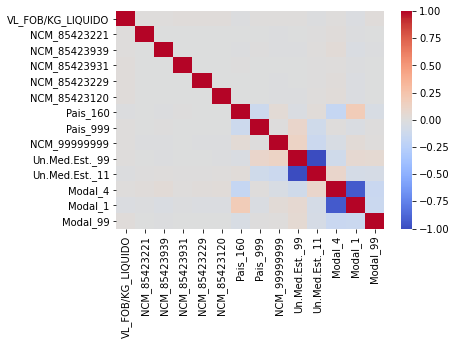

In [97]:
sns.heatmap(df2.corr(),cmap="coolwarm", annot=False )

In [98]:
#Considerando que as Modal_1 e Modal_4 estão fortemente relacionadas, e Un.Med.Est._11 e Un.Med.Est._99 também estão fortemente relacionadas, irei retirar cada uma delas antes da elaboração do modelo
df2=df2.drop(columns=["Modal_1", "Un.Med.Est._11"])

# Dividindo o dataset em "base de teste" e "base de treinamento"

In [99]:
df2.columns

Index(['VL_FOB/KG_LIQUIDO', 'NCM_85423221', 'NCM_85423939', 'NCM_85423931',
       'NCM_85423229', 'NCM_85423120', 'Pais_160', 'Pais_999', 'NCM_99999999',
       'Un.Med.Est._99', 'Modal_4', 'Modal_99'],
      dtype='object')

In [100]:
x = df2[['NCM_85423221', 'NCM_85423939', 'NCM_85423931',
       'NCM_85423229', 'NCM_85423120', 'Pais_160', 'Pais_999', 'NCM_99999999',
       'Un.Med.Est._99', 'Modal_4', 'Modal_99']]
y = df2['VL_FOB/KG_LIQUIDO']

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=16)

# Treinando o modelo LinearRegression

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
lm = LinearRegression()

In [105]:
lm.fit(x_train,y_train)

LinearRegression()

In [106]:
# impressão do intercepto
print(lm.intercept_)

27.01202062966138


In [107]:
# impressão dos coeficientes
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coeficiente'])
coeff_df

,Coeficiente
NCM_85423221,3537.970138
NCM_85423939,2508.221994
NCM_85423931,8883.528176
NCM_85423229,6226.765079
NCM_85423120,4849.864916
Pais_160,-163.407076
Pais_999,488.840141
NCM_99999999,703.329309
Un.Med.Est._99,715.375113
Modal_4,412.706201


In [108]:
# realizando as predições
predicoesLR = lm.predict(x_test)

# Treinando o modelo Random Forest Regressor

In [109]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [110]:
predicoesRFR = rfr.predict(x_test)

# Treinando o modelo Gradient Boosting Regressor

In [111]:
from sklearn.ensemble import GradientBoostingRegressor

In [112]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [113]:
predicoesGBR = gbr.predict(x_test)

# Avaliando os modelos

#### Root Mean squared error

In [114]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [115]:
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

In [116]:
RMSE_LR = rmse(y_test,predicoesLR)
RMSE_LR

14388.865853042082

In [117]:
RMSE_RFR = rmse(y_test,predicoesRFR)
RMSE_RFR

10142.714174523317

In [118]:
RMSE_GBR = rmse(y_test,predicoesGBR)
RMSE_GBR

13343.563741761436

#### Mean absolute error

In [119]:
from sklearn.metrics import mean_absolute_error

In [120]:
erro_absoluto_LR=mean_absolute_error(y_test, predicoesLR)
erro_absoluto_LR

529.6808929159862

In [121]:
erro_absoluto_RFR=mean_absolute_error(y_test, predicoesRFR)
erro_absoluto_RFR

425.3459938467776

In [122]:
erro_absoluto_GBR=mean_absolute_error(y_test, predicoesGBR)
erro_absoluto_GBR

511.48479970433044

#### Mean squared error - MSE

In [123]:
MSE_LR=mean_squared_error(y_test, predicoesLR)
MSE_LR

207039460.53684044

In [124]:
MSE_RFR=mean_squared_error(y_test, predicoesRFR)
MSE_RFR

102874650.82607621

In [125]:
MSE_GBR=mean_squared_error(y_test, predicoesGBR)
MSE_GBR

178050693.33045048

#### R2 Score

In [126]:
from sklearn.metrics import r2_score

In [127]:
R2_score_LR=r2_score(y_test, predicoesLR)
R2_score_LR

0.0023786992944871965

In [128]:
R2_score_RFR=r2_score(y_test, predicoesRFR)
R2_score_RFR

0.5042976701126319

In [129]:
R2_score_GBR=r2_score(y_test, predicoesGBR)
R2_score_GBR

0.14206130651970306